In [ ]:
# Setup
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=FutureWarning)

sns.set_theme(style="whitegrid")
df = pd.read_csv('diabetes_health_indicators.csv')

In [114]:
# Convert all floats to ints
for name, values in df.items():
    if name in df.columns:
        df[name] = pd.to_numeric(df[name], errors='coerce')
        df[name] = df[name].astype('Int64')

# Map numerical data to descriptive data
# Create copy for cleaning
df = df.rename(columns={'Diabetes_012': 'Diabetes_Status'})
df_clean = df.copy()

binary_map = {0: 'No', 1: 'Yes', 7: 'Not Sure', 9: 'No Response'}
sex_map = {0: 'Female', 1: 'Male'}

diabetes_map = {
    0: 'No Diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
}

gen_hlth_map = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor',
    7: 'Not Sure',
    9: 'No Response'
}

education_map = {
    1: 'Never attended school',
    2: 'Grades 1-8',
    3: 'Grades 9-11',
    4: 'Grade 12/GED',
    5: 'College 1-3 years',
    6: 'College 4+ years',
    9: 'No Response',
}

income_map = {
    1: '< $10,000',
    2: '$10,000 - $14,999',
    3: '$15,000 - $19,999',
    4: '$20,000 - $24,999',
    5: '$25,000 - $34,999',
    6: '$35,000 - $49,999',
    7: '$50,000 - $74,999',
    8: '>= $75,000',
    77: 'Not Sure',
    99: 'No Response'
}

age_map = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80+', 14: 'No Response'
}


df_clean['Diabetes_Status'] = df_clean['Diabetes_Status'].map(diabetes_map)

binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk'
]

for col in binary_cols:
    if col in df.columns:
        df_clean[col] = df_clean[col].map(binary_map)


df_clean['Sex'] = df_clean['Sex'].map(sex_map)

scale_mappings = {
    'GenHlth': gen_hlth_map,
    'Education': education_map,
    'Income': income_map,
    'Age': age_map
}

for col, mapping in scale_mappings.items():
    if col in df.columns:
        df_clean[col] = df_clean[col].map(mapping)

# Diabetes Health Indicators Analysis

## Background

Diabetes is a chronic health condition affecting millions of people worldwide. This project analyzes a dataset of health indicators to understand factors associated with diabetes prevalence and risk.

## Problem Definition

This analysis aims to:

1. Identify which health indicators are most strongly associated with diabetes status
2. Examine how demographic factors correlate with diabetes risk
3. Explore relationships between modifiable risk factors and diabetes
4. Suggest potential intervention points for diabetes prevention

The dataset reveals a significant disparity in diabetes prevalence among the studied population. The majority of subjects, approximately 85%, have no diabetes, while only about 13% have diabetes and a mere 2% have prediabetes. This distribution highlights that while diabetes affects a minority of the population, it still represents a substantial health burden given the sample size. The stark contrast between these groups provides a strong basis for comparative analysis of risk factors and demographic patterns associated with the condition.

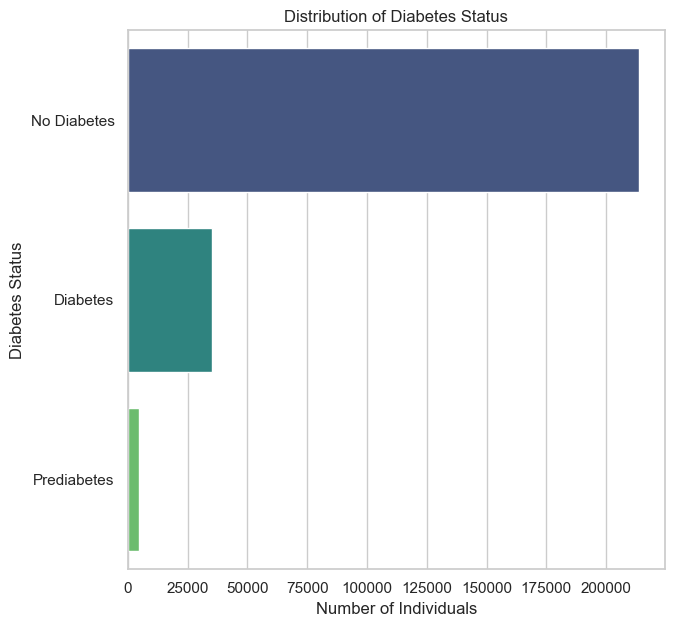

In [112]:
# Create a dashboard of visualizations
plt.figure(figsize=(18, 12))

# Diabetes Status Distribution
plt.subplot(2, 3, 1)
sns.countplot(y='Diabetes_Status', data=df_clean, palette='viridis')
plt.title('Distribution of Diabetes Status')
plt.xlabel('Number of Individuals')
plt.ylabel('Diabetes Status')
plt.tight_layout()

BMI distributions show a clear relationship with diabetes status. Individuals with diabetes and prediabetes demonstrate notably higher median BMI values, approximately 30 and 29 respectively, compared to those without diabetes at approximately 25. The density plot reveals that people without diabetes have a peak BMI distribution around 25, while those with diabetes show a broader distribution with higher concentrations in the overweight (BMI 25-30) and obese (BMI greater than 30) ranges. This visualization confirms BMI as a significant risk factor, with higher values strongly associated with diabetes diagnosis.

In [ ]:
# BMI vs Diabetes Status
sns.boxplot(x='Diabetes_Status', y='BMI', data=df_clean)
plt.xlabel('Diabetes Status')
plt.title('BMI by Diabetes Status')
plt.xticks(rotation=45)
plt.tight_layout()

Age emerges as a critical factor in diabetes prevalence, with a dramatic increase observed in older age groups. The graph below demonstrates that diabetes rates begin climbing noticeably after age 45, with the steepest increases in the 65-69, 70-74, 75-79, and 80+ age brackets. The visualization reveals that while diabetes affects less than 10% of adults under 45, this rate more than doubles to over 20% in the elderly population. This clear age-related progression suggests that screening and intervention strategies should be prioritized based on age, particularly for individuals entering middle age and beyond.

In [ ]:
# Age Distribution by Diabetes
age_diabetes = pd.crosstab(df_clean['Age'], df_clean['Diabetes_Status'], normalize='index') * 100
age_diabetes.plot(kind='bar', stacked=True)
plt.title('Diabetes Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Diabetes Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

Individuals with diabetes show substantially higher rates of coexisting conditions. Those with diabetes have markedly elevated rates of high blood pressure (73%), high cholesterol (67%), and heart disease (22%) compared to non-diabetic individuals (38%, 35%, and 7% respectively). Interestingly, prediabetic individuals also show higher rates of these conditions than the non-diabetic group, suggesting that these conditions may develop along a continuum with prediabetes representing an intermediate risk state. These patterns underscore the interconnected nature of metabolic and cardiovascular conditions, highlighting the importance of comprehensive care approaches.

In [ ]:
# Health Metrics Comparison
health_vars = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke']
yes_percentages = {}

for var in health_vars:
    yes_percentages[var] = pd.crosstab(df_clean['Diabetes_Status'], df_clean[var])['Yes'] / \
                         df_clean['Diabetes_Status'].value_counts() * 100

pd.DataFrame(yes_percentages).plot(kind='bar')
plt.title('Health Conditions by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage with Condition')
plt.xticks(rotation=45)
plt.tight_layout()

Self-reported general health shows a striking correlation with diabetes status. The graph below reveals that individuals without diabetes most frequently report "very good" health (38%), while those with diabetes more commonly report only "good" (27%) or "fair" (28%) health, with very few reporting "excellent" health (3%). This suggests that diabetes significantly impacts perceived well-being and quality of life. Prediabetic individuals show an intermediate pattern, with health ratings falling between the other two groups, further supporting the concept of prediabetes as a transitional state in terms of both physical health and subjective well-being.

In [ ]:
# General Health by Diabetes
health_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
gen_health = pd.crosstab(df_clean['Diabetes_Status'], df_clean['GenHlth'])
gen_health_pct = gen_health.div(gen_health.sum(axis=1), axis=0) * 100

# Select only the ordered health categories and convert to DataFrame for plotting
gen_health_pct_ordered = gen_health_pct[health_order].reset_index()
gen_health_pct_ordered = pd.melt(gen_health_pct_ordered, id_vars=['Diabetes_Status'],
                                value_vars=health_order)

sns.barplot(x='Diabetes_Status', y='value', hue='GenHlth', data=gen_health_pct_ordered,
           hue_order=health_order, palette='YlOrRd')
plt.title('General Health by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage')
plt.legend(title='Health Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

The analysis of lifestyle behaviors in the bar chart below reveals meaningful differences across diabetes status groups. People without diabetes show higher rates of positive health behaviors: physical activity (78%), fruit consumption (63%), and vegetable intake (81%) compared to diabetic individuals (63%, 60%, and 75% respectively). Heavy alcohol consumption is generally low across all groups but slightly higher in those without diabetes. These patterns suggest that lifestyle modifications might be both preventive for those at risk and beneficial for those already diagnosed with diabetes or prediabetes, with particular emphasis on increasing physical activity.

In [ ]:
# Lifestyle Factors
lifestyle = ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
lifestyle_yes = {}

for var in lifestyle:
    lifestyle_yes[var] = pd.crosstab(df_clean['Diabetes_Status'], df_clean[var])['Yes'] / \
                        df_clean['Diabetes_Status'].value_counts() * 100

pd.DataFrame(lifestyle_yes).plot(kind='bar')
plt.title('Lifestyle Factors by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Percentage Answering Yes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.tight_layout()
plt.show()

The correlation matrix provides a comprehensive view of the relationships between health variables. Diabetes status shows the strongest positive correlations with general health (0.30), high blood pressure (0.27), BMI (0.22), and difficulty walking (0.22). Prior figures confirm these as the top factors associated with diabetes. Physical activity shows a negative correlation (-0.12), indicating its protective effect. This analysis reinforces the complex, interconnected nature of diabetes with various physiological, behavioral, and demographic factors, suggesting that comprehensive assessment and intervention approaches are necessary.

In [ ]:
# Correlation analysis using original numeric data
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
           square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Health Indicators', fontsize=16)
plt.tight_layout()
plt.show()

# Extract and plot top correlations with Diabetes_Stats
diabetes_corr = corr['Diabetes_Status'].sort_values(ascending=False)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=diabetes_corr.values[1:16], y=diabetes_corr.index[1:16], palette='viridis')
ax.set_ylabel('')  # hide y-axis label
plt.title('Top 15 Variables Correlated with Diabetes', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

The prevalence of diabetes shows minimal variation between sexes. Both females and males exhibit similar patterns with approximately 13-15% having diabetes and 1-2% having prediabetes. This suggests that biological sex alone may not be a strong independent risk factor for diabetes, though interactions between sex and other risk factors could still be clinically relevant. The comparable rates across sexes indicate that diabetes prevention and management strategies should target both men and women equally, with emphasis on risk factors that transcend sex differences.

In [ ]:
# Sex and Diabetes
plt.figure(figsize=(10, 6))
sex_data = []
for sex in df_clean['Sex'].unique():
    for status in df_clean['Diabetes_Status'].unique():
        subset = df_clean[(df_clean['Sex'] == sex)]
        pct = (subset['Diabetes_Status'] == status).mean() * 100
        sex_data.append({'Sex': sex, 'Diabetes_Status': status, 'Percentage': pct})

sex_df = pd.DataFrame(sex_data)
sns.barplot(x='Sex', y='Percentage', hue='Diabetes_Status', data=sex_df, palette='viridis')
plt.title('Diabetes Status by Sex', fontsize=14)
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


Education level demonstrates a clear inverse relationship with diabetes prevalence. The comparison below shows that individuals with higher education levels, specifically those with college education, have significantly lower diabetes rates (10% for those with 4+ years of college) compared to those with less education (27% for those who never attended school). Similarly, higher income levels are associated with lower diabetes prevalence, with rates decreasing from 25% in the lowest income bracket to just 8% in the highest. These socioeconomic trends highlight the social determinants of health and suggest that educational initiatives and economic policies could indirectly impact diabetes prevalence by addressing these underlying disparities.

In [ ]:
# Education Factors
plt.figure(figsize=(12, 8))

ax = sns.barplot(x='Education', y='Percentage', hue='Diabetes_Status',
                 data=edu_df, palette='viridis', order=edu_order)

plt.title('Diabetes Status by Education', fontsize=14)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
xticks = ax.get_xticklabels()

for i, lbl in enumerate(xticks):
    offset = -0.03 if (i % 2 == 0) else -0.08
    lbl.set_y(offset)

plt.subplots_adjust(bottom=0.30)
plt.legend(title='Diabetes Status', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Income and Diabetes
plt.figure(figsize=(12, 8))
income_order = [v for _, v in sorted(income_map.items()) if v not in ['Not Sure', 'No Response']]
income_data = []
for inc in income_order:
    if inc in df_clean['Income'].values:
        for status in df_clean['Diabetes_Status'].unique():
            subset = df_clean[(df_clean['Income'] == inc)]
            if len(subset) > 0:
                pct = (subset['Diabetes_Status'] == status).mean() * 100
                income_data.append({'Income': inc, 'Diabetes_Status': status, 'Percentage': pct})

income_df = pd.DataFrame(income_data)
ax = sns.barplot(x='Income', y='Percentage', hue='Diabetes_Status', data=income_df, palette='viridis', order=income_order)
plt.title('Diabetes Status by Income', fontsize=14)
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')

ax.tick_params(axis='x', which='major', pad=10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Diabetes Status', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.subplots_adjust(bottom=0.30)
plt.tight_layout()
plt.show()


In [ ]:
# BMI Distribution by Diabetes Status
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_clean, x='BMI', hue='Diabetes_Status', palette='viridis', fill=True)
plt.title('BMI Distribution by Diabetes Status', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.axvline(x=25, color='green', linestyle='--', label='Overweight Threshold')
plt.axvline(x=30, color='red', linestyle='--', label='Obesity Threshold')
plt.legend()
plt.tight_layout()
plt.show()

The combined risk score analysis below illustrates how risk factors accumulate differently across diabetes status groups. Individuals with diabetes show significantly higher median risk scores and wider variability in their risk profiles compared to those without diabetes. This analysis suggests that diabetes is often accompanied by a constellation of risk factors rather than isolated abnormalities. The violin plot of BMI by physical activity further demonstrates how lifestyle factors interact with metabolic parameters across diabetes status groups, with physical activity associated with lower BMI distributions regardless of diabetes status.

In [ ]:
# Risk Factor Analysis
plt.figure(figsize=(12, 8))
risk_df = df.copy()
risk_df['BMI_Risk'] = risk_df['BMI'].apply(lambda x: 0 if x < 25 else (1 if x < 30 else 2))
risk_df['Total_Risk'] = risk_df['HighBP'] + risk_df['HighChol'] + risk_df['BMI_Risk']
risk_df['Diabetes_Status'] = df_clean['Diabetes_Status']

sns.boxplot(x='Diabetes_Status', y='Total_Risk', data=risk_df, palette='viridis')
plt.title('Combined Risk Score by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status')
plt.ylabel('Risk Score (Higher = More Risk Factors)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The scatter plot exploring the relationship between age, BMI, and diabetes status reveals complex interactions between these variables. While higher BMI values are more frequently associated with diabetes regardless of age, the distribution of points suggests that the BMI threshold for diabetes risk may vary across age groups. This visualization helps identify particularly vulnerable populations, specifically those with both advanced age and elevated BMI, who may benefit most from targeted screening and intervention efforts.

In [ ]:
# BMI and Physical Activity Relationship
plt.figure(figsize=(12, 8))
physical_act_data = pd.DataFrame({
    'BMI': df['BMI'],
    'PhysActivity': df_clean['PhysActivity'],
    'Diabetes_Status': df_clean['Diabetes_Status']
})

sns.violinplot(x='Diabetes_Status', y='BMI', hue='PhysActivity',
              data=physical_act_data, palette='viridis', split=True)
plt.title('BMI by Diabetes Status and Physical Activity', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xlabel('Diabetes Status')
plt.tight_layout()
plt.show()

In [ ]:
# Age, BMI, and Diabetes Status
plt.figure(figsize=(14, 8))
age_bmi_data = pd.DataFrame({
    'Age_Numeric': df['Age'],
    'BMI': df['BMI'],
    'Diabetes_Status': df_clean['Diabetes_Status']
})

sns.scatterplot(x='Age_Numeric', y='BMI', hue='Diabetes_Status',
               data=age_bmi_data, palette='viridis', alpha=0.5)
plt.title('Relationship Between Age, BMI, and Diabetes Status', fontsize=16)
plt.xlabel('Age Group (Numeric)')
plt.ylabel('BMI')
plt.axhline(y=25, color='green', linestyle='--', label='Overweight Threshold')
plt.axhline(y=30, color='red', linestyle='--', label='Obesity Threshold')
plt.legend(title='Diabetes Status')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusion

This exploratory data analysis reveals diabetes as a complex condition with multiple interrelated risk factors spanning demographics, lifestyle behaviors, comorbidities, and socioeconomic indicators. The clear patterns observed across BMI distributions, age groups, comorbidity rates, and socioeconomic gradients provide valuable insights for developing targeted prevention strategies and personalized interventions. The analysis particularly highlights the importance of addressing modifiable factors such as physical activity and diet, while recognizing the influence of social determinants like education and income on diabetes risk. These findings can inform both clinical approaches to diabetes management and public health policies aimed at reducing diabetes burden in the population.